To carry out gaussian elimination, we first need a function that will convert our matrix to upper triangular form.

In [1]:
import numpy as np

In [3]:
def upper_triangle(A, b):
    #This uses row operations on the vector b and Matrix A 
    # to convert it to upper triangular 
    n = np.size(b)
    rows, cols = np.shape(A)
    assert(rows == cols)
    assert(rows == n) #i.e. verify that A is square and has the same number of rows as vector b
    
    for k in range(n-1):
        for i in range(k+1, n):
            #define a scale factor for a row outside the innermost loop
            #value gets changes as A is over-written
            s = (A[i, k] / A[k, k])
            #Update the current 
            for j in range(k, n):
                A[i, j] = A[i, j] - s*A[k, j]
            #update the corresponding entry of b
            b[i] = b[i] - s*b[k]
            
    return A, b

**Now** that the code is in upper triangular form, we can use back-substitution to obtain a final solution x. 
Using the principle that Ax=b, we can rearrange to get x = b/A or, with respect to the dimensionality of the matrix:

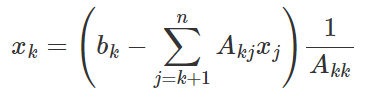

In [6]:
def back_substitution(A, b):
    
    n = np.size(b)
    #check A is square and rows and columns in A are the same as size vector b
    rows, cols = np.shape(A)
    assert(rows == cols)
    assert(rows == n)
    #np.triu returns the triangular part of a matrix; if A has been 
    #successfully converted, then it will return the entire matrix
    assert(np.allclose(A, np.triu(A)))

    x = np.zeros(n)
    for k in range(n-1, -1, -1):
        s = 0
        for j in range(k+1, n):
            s = s + A[k,j]*x[j]
        x[k] = (b[k] - s)/A[k, k]
        
    return x

#this returns the matrix x